In [60]:
import requests as rq 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv 
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier



In [61]:
weather = []
start_date = datetime(2023, 10, 24)  # Bắt đầu từ ngày hiện tại
end_date = datetime(2024, 10, 24)  # Dự báo cho 14 ngày tới (tối đa với API miễn phí)
current_date = start_date

while current_date < end_date: 
    # Format the date for the API call
    date_str = current_date.strftime('%Y-%m-%d')
    response = rq.get(f'http://api.weatherapi.com/v1/history.json?key=1ffe9ae1c48d47a78d624722242410&q=Ho Chi Minh&dt={date_str}')
    
    if response.status_code == 200:
        rsp = response.json()
        day_data = rsp['forecast']['forecastday'][0]['day']
        location = rsp['location']
        weather.append([
            date_str, 
            location['name'],
            location['country'],
            location['localtime'],
            location['lat'],
            location['lon'],
            day_data['maxtemp_c'],
            day_data['mintemp_c'],
            day_data['avgtemp_c'],
            day_data['maxwind_mph'],
            day_data["maxwind_kph"],
            day_data['totalprecip_mm'],
            day_data["avghumidity"],
            day_data['uv'],
            day_data['condition']['text']  
        ]) 
        print(f"Added data for {date_str}")
    else:
        print(f"Failed to fetch data for {date_str}")
    
    current_date += timedelta(days=1)
csv_file_path = 'weather_data.csv'

# Write the weather data to a CSV file
with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['Date', 'City', 'Country', 'Local Time', 'Latitude', 'Longitude', 'Max Temp (C)', 'Min Temp (C)', 
                     'Avg Temp (C)', 'Max Wind (mph)', 'Max Wind (kph)', 'Total Precip (mm)', 
                     'Avg Humidity (%)', 'UV Index', 'Condition'])
    # Write the data rows   
    writer.writerows(weather)

print(f"Weather data has been saved to {csv_file_path}")
# print(weather)

Added data for 2023-10-24
Added data for 2023-10-25
Added data for 2023-10-26
Added data for 2023-10-27
Added data for 2023-10-28
Added data for 2023-10-29
Added data for 2023-10-30
Added data for 2023-10-31
Added data for 2023-11-01
Added data for 2023-11-02
Added data for 2023-11-03
Added data for 2023-11-04
Added data for 2023-11-05
Added data for 2023-11-06
Added data for 2023-11-07
Added data for 2023-11-08
Added data for 2023-11-09
Added data for 2023-11-10
Added data for 2023-11-11
Added data for 2023-11-12
Added data for 2023-11-13
Added data for 2023-11-14
Added data for 2023-11-15
Added data for 2023-11-16
Added data for 2023-11-17
Added data for 2023-11-18
Added data for 2023-11-19
Added data for 2023-11-20
Added data for 2023-11-21
Added data for 2023-11-22
Added data for 2023-11-23
Added data for 2023-11-24
Added data for 2023-11-25
Added data for 2023-11-26
Added data for 2023-11-27
Added data for 2023-11-28
Added data for 2023-11-29
Added data for 2023-11-30
Added data f

In [62]:
# Load data
df = pd.read_csv('weather_data.csv')

In [63]:
# Step 1: Convert Local Time to datetime format
df['Local Time'] = pd.to_datetime(df['Local Time'])

In [64]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].astype(float)

print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [65]:
# Đọc file CSV vào DataFrame
df = pd.read_csv('weather_data.csv')

# Xóa cột 'Max Wind (mph)'
df = df.drop(columns=['Max Wind (mph)'])

# Ghi lại DataFrame vào file CSV mới
df.to_csv('weather_data.csv', index=False)

In [66]:
df.head()

,Date,City,Country,Local Time,Latitude,Longitude,Max Temp (C),Min Temp (C),Avg Temp (C),Max Wind (kph),Total Precip (mm),Avg Humidity (%),UV Index,Condition
0,2023-10-24,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,31.0,24.5,27.0,11.2,21.59,84,7.0,Light rain shower
1,2023-10-25,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,30.9,24.4,26.8,11.5,11.34,84,7.0,Light rain shower
2,2023-10-26,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,32.4,24.2,27.2,12.6,1.97,81,7.0,Light rain shower
3,2023-10-27,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,32.3,24.4,27.2,9.0,4.84,83,7.0,Light rain shower
4,2023-10-28,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,32.3,24.4,27.4,10.4,4.43,81,7.0,Light rain shower


In [67]:
df=pd.read_csv("weather_data.csv")
df.head()

,Date,City,Country,Local Time,Latitude,Longitude,Max Temp (C),Min Temp (C),Avg Temp (C),Max Wind (kph),Total Precip (mm),Avg Humidity (%),UV Index,Condition
0,2023-10-24,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,31.0,24.5,27.0,11.2,21.59,84,7.0,Light rain shower
1,2023-10-25,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,30.9,24.4,26.8,11.5,11.34,84,7.0,Light rain shower
2,2023-10-26,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,32.4,24.2,27.2,12.6,1.97,81,7.0,Light rain shower
3,2023-10-27,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,32.3,24.4,27.2,9.0,4.84,83,7.0,Light rain shower
4,2023-10-28,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,32.3,24.4,27.4,10.4,4.43,81,7.0,Light rain shower


In [68]:
df.drop_duplicates(inplace=True)

In [69]:
missing_data = df.isnull().sum()
print(missing_data)

Date                 0
City                 0
Country              0
Local Time           0
Latitude             0
Longitude            0
Max Temp (C)         0
Min Temp (C)         0
Avg Temp (C)         0
Max Wind (kph)       0
Total Precip (mm)    0
Avg Humidity (%)     0
UV Index             0
Condition            0
dtype: int64


In [70]:
stats = df.describe()
print(stats)

       Latitude     Longitude  Max Temp (C)  Min Temp (C)  Avg Temp (C)  \
count    362.00  3.620000e+02    362.000000    362.000000    362.000000   
mean      10.75  1.066667e+02     33.629834     24.997790     28.383149   
std        0.00  8.396009e-13      3.443569      1.539326      1.980268   
min       10.75  1.066667e+02     25.500000     21.000000     24.400000   
25%       10.75  1.066667e+02     31.400000     23.925000     27.000000   
50%       10.75  1.066667e+02     33.650000     24.700000     28.100000   
75%       10.75  1.066667e+02     36.500000     25.800000     29.800000   
max       10.75  1.066667e+02     40.800000     29.800000     32.900000   

       Max Wind (kph)  Total Precip (mm)  Avg Humidity (%)    UV Index  
count      362.000000         362.000000        362.000000  362.000000  
mean        17.929834           4.520608         70.555249    7.560773  
std          6.134462           6.857693         12.050149    1.054161  
min          7.200000           

In [71]:
df.dtypes

Date                  object
City                  object
Country               object
Local Time            object
Latitude             float64
Longitude            float64
Max Temp (C)         float64
Min Temp (C)         float64
Avg Temp (C)         float64
Max Wind (kph)       float64
Total Precip (mm)    float64
Avg Humidity (%)       int64
UV Index             float64
Condition             object
dtype: object

In [72]:
rain_conditions = ['Light rain shower', 'Patchy rain possible', 'Patchy light drizzle', 'Patchy light rain with thunder', 'Light drizzle']
df['Status'] = df['Condition'].apply(lambda x: 1 if x in rain_conditions else 0)


In [73]:
# Step 6: Add Avg Temp (F) column converted from Celsius
df['Avg Temp (F)'] = (df['Avg Temp (C)'] * 9/5) + 32  # Celsius to Fahrenheit conversion
df.to_csv('weather_data.csv', index=False)


In [74]:
# Reorder columns to place 'Status' before 'Condition' and Avg Temp columns together
cols = df.columns.tolist()
status_index = cols.index('Status')
condition_index = cols.index('Condition')
avg_temp_c_index = cols.index('Avg Temp (C)')
avg_temp_f_index = cols.index('Avg Temp (F)')


In [75]:
# Move Status before Condition
cols.insert(condition_index, cols.pop(status_index))

In [76]:
# Move Avg Temp (F) next to Avg Temp (C)
if avg_temp_f_index > avg_temp_c_index:
    cols.insert(avg_temp_c_index + 1, cols.pop(avg_temp_f_index))

In [77]:
df = df[cols]

In [78]:
# Map the 'Status' column for display purposes
df_display = df.copy()
df_display['Status'] = df_display['Status'].map({1: 'Rain', 0: 'No Rain'})

In [79]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [80]:
# Display results
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['Latitude', 'Longitude', 'Max Temp (C)', 'Min Temp (C)', 'Avg Temp (C)', 'Avg Temp (F)', 'Max Wind (kph)', 'Total Precip (mm)', 'Avg Humidity (%)', 'UV Index', 'Status']
Categorical Columns: ['Date', 'City', 'Country', 'Local Time', 'Condition']


In [81]:
df_display.head()

,Date,City,Country,Local Time,Latitude,Longitude,Max Temp (C),Min Temp (C),Avg Temp (C),Avg Temp (F),Max Wind (kph),Total Precip (mm),Avg Humidity (%),UV Index,Status,Condition
0,2023-10-24,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,31.0,24.5,27.0,80.60,11.2,21.59,84,7.0,Rain,Light rain shower
1,2023-10-25,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,30.9,24.4,26.8,80.24,11.5,11.34,84,7.0,Rain,Light rain shower
2,2023-10-26,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,32.4,24.2,27.2,80.96,12.6,1.97,81,7.0,Rain,Light rain shower
3,2023-10-27,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,32.3,24.4,27.2,80.96,9.0,4.84,83,7.0,Rain,Light rain shower
4,2023-10-28,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,32.3,24.4,27.4,81.32,10.4,4.43,81,7.0,Rain,Light rain shower


In [82]:
df.head()

,Date,City,Country,Local Time,Latitude,Longitude,Max Temp (C),Min Temp (C),Avg Temp (C),Avg Temp (F),Max Wind (kph),Total Precip (mm),Avg Humidity (%),UV Index,Status,Condition
0,2023-10-24,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,31.0,24.5,27.0,80.60,11.2,21.59,84,7.0,1,Light rain shower
1,2023-10-25,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,30.9,24.4,26.8,80.24,11.5,11.34,84,7.0,1,Light rain shower
2,2023-10-26,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,32.4,24.2,27.2,80.96,12.6,1.97,81,7.0,1,Light rain shower
3,2023-10-27,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,32.3,24.4,27.2,80.96,9.0,4.84,83,7.0,1,Light rain shower
4,2023-10-28,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,32.3,24.4,27.4,81.32,10.4,4.43,81,7.0,1,Light rain shower


In [83]:
df= df.drop(columns=['UV Index'])
df.to_csv('weather_data.csv', index=False)

In [84]:
df.head()

,Date,City,Country,Local Time,Latitude,Longitude,Max Temp (C),Min Temp (C),Avg Temp (C),Avg Temp (F),Max Wind (kph),Total Precip (mm),Avg Humidity (%),Status,Condition
0,2023-10-24,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,31.0,24.5,27.0,80.60,11.2,21.59,84,1,Light rain shower
1,2023-10-25,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,30.9,24.4,26.8,80.24,11.5,11.34,84,1,Light rain shower
2,2023-10-26,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,32.4,24.2,27.2,80.96,12.6,1.97,81,1,Light rain shower
3,2023-10-27,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,32.3,24.4,27.2,80.96,9.0,4.84,83,1,Light rain shower
4,2023-10-28,Ho Chi Minh City,Vietnam,2024-10-24 21:58,10.75,106.6667,32.3,24.4,27.4,81.32,10.4,4.43,81,1,Light rain shower


In [85]:
df.describe()

,Latitude,Longitude,Max Temp (C),Min Temp (C),Avg Temp (C),Avg Temp (F),Max Wind (kph),Total Precip (mm),Avg Humidity (%),Status
count,362.00,3.620000e+02,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,10.75,1.066667e+02,33.629834,24.997790,28.383149,83.089669,17.929834,4.520608,70.555249,0.588398
std,0.00,8.396009e-13,3.443569,1.539326,1.980268,3.564482,6.134462,6.857693,12.050149,0.492805
min,10.75,1.066667e+02,25.500000,21.000000,24.400000,75.920000,7.200000,0.000000,48.000000,0.000000
25%,10.75,1.066667e+02,31.400000,23.925000,27.000000,80.600000,12.600000,0.000000,60.000000,0.000000
50%,10.75,1.066667e+02,33.650000,24.700000,28.100000,82.580000,16.900000,1.150000,70.000000,1.000000
75%,10.75,1.066667e+02,36.500000,25.800000,29.800000,85.640000,23.000000,6.710000,82.000000,1.000000
max,10.75,1.066667e+02,40.800000,29.800000,32.900000,91.220000,31.700000,44.000000,95.000000,1.000000


# Data Analysis


## Show 5 days with the highest temperature, wind speed

In [109]:
df=pd.read_csv("weather_data.csv")

In [110]:
# 5 days with highest temperature
top_temp = df.nlargest(5, 'Avg Temp (C)')
print("5 ngày có nhiệt độ cao nhất:\n", top_temp[['Date', 'Avg Temp (C)']])

5 ngày có nhiệt độ cao nhất:
            Date  Avg Temp (C)
188  2024-04-29          32.9
192  2024-05-03          32.9
191  2024-05-02          32.7
185  2024-04-26          32.6
186  2024-04-27          32.6


In [111]:
top_humidity = df.nlargest(5, 'Avg Humidity (%)')
print("5 ngày có độ ẩm cao nhất:\n", top_humidity[['Date', 'Avg Humidity (%)']])

5 ngày có độ ẩm cao nhất:
            Date  Avg Humidity (%)
360  2024-10-22                95
245  2024-06-25                93
270  2024-07-20                93
310  2024-09-02                92
241  2024-06-21                91


In [112]:
top_wind_speed = df.nlargest(5, 'Max Wind (kph)')
print("5 ngày có tốc độ gió cao nhất:\n", top_wind_speed[['Date', 'Max Wind (kph)']])

5 ngày có tốc độ gió cao nhất:
            Date  Max Wind (kph)
168  2024-04-09            31.7
137  2024-03-09            29.9
147  2024-03-19            29.9
139  2024-03-11            29.5
154  2024-03-26            29.5


In [113]:
top_precipitation = df.nlargest(5, 'Total Precip (mm)')
print("5 ngày có lượng mưa cao nhất:\n", top_precipitation[['Date', 'Total Precip (mm)']])

5 ngày có lượng mưa cao nhất:
            Date  Total Precip (mm)
241  2024-06-21              44.00
325  2024-09-17              38.25
194  2024-05-05              37.48
319  2024-09-11              27.90
360  2024-10-22              27.67


In [114]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
monthly_avg_condition = df.groupby(df['Date'].dt.month)['Avg Temp (C)'].mean()

top_2_months = monthly_avg_condition.nlargest(2)
print("2 tháng có nhiệt độ trung bình cao nhất:\n", top_2_months)

2 tháng có nhiệt độ trung bình cao nhất:
 Date
4    31.533333
5    31.164516
Name: Avg Temp (C), dtype: float64


In [115]:

df = pd.read_csv('weather_data.csv')


shape = df.shape
print(shape)


(362, 15)


In [119]:

df = pd.read_csv('weather_data.csv')


df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


monthly_precipitation_mean = df['Total Precip (mm)'].resample('M').mean()
monthly_precipitation_min = df['Total Precip (mm)'].resample('M').min()
monthly_precipitation_max = df['Total Precip (mm)'].resample('M').max()
monthly_precipitation_median = df['Total Precip (mm)'].resample('M').median()
monthly_precipitation_variance=df['Total Precip (mm)'].resample('M').var()

print("Monthly precipitation mean:\n",monthly_precipitation_mean,
    "Monthly precipitation min:\n",monthly_precipitation_min,
    "Monthly precipitation max\n" , monthly_precipitation_median,
)

Monthly precipitation mean:
 Date
2023-10-31     9.110000
2023-11-30     4.085000
2023-12-31     0.860645
2024-01-31     0.002581
2024-02-29     0.011034
2024-03-31     0.035484
2024-04-30     0.073000
2024-05-31     6.191290
2024-06-30     9.206333
2024-07-31     7.954194
2024-08-31     5.137037
2024-09-30     9.361000
2024-10-31    12.018696
Freq: M, Name: Total Precip (mm), dtype: float64 Monthly precipitation min:
 Date
2023-10-31    1.97
2023-11-30    0.01
2023-12-31    0.00
2024-01-31    0.00
2024-02-29    0.00
2024-03-31    0.00
2024-04-30    0.00
2024-05-31    0.00
2024-06-30    0.04
2024-07-31    0.06
2024-08-31    0.62
2024-09-30    0.01
2024-10-31    2.75
Freq: M, Name: Total Precip (mm), dtype: float64 Monthly precipitation max
 Date
2023-10-31    8.620
2023-11-30    4.270
2023-12-31    0.220
2024-01-31    0.000
2024-02-29    0.000
2024-03-31    0.000
2024-04-30    0.000
2024-05-31    3.100
2024-06-30    7.495
2024-07-31    7.020
2024-08-31    3.420
2024-09-30    8.165
2024

In [120]:
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-02-01', '2023-02-02', '2023-02-03'],
    'Total Precip (mm)': [5, 3, 0, 7, 2, 1]
}
df = pd.DataFrame(data)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

monthly_precipitation_mean = df['Total Precip (mm)'].resample('M').mean()
monthly_precipitation_min = df['Total Precip (mm)'].resample('M').min()
monthly_precipitation_max = df['Total Precip (mm)'].resample('M').max()
monthly_precipitation_median = df['Total Precip (mm)'].resample('M').median()
monthly_precipitation_variance = df['Total Precip (mm)'].resample('M').var()

# Print results as specified
(monthly_precipitation_mean, monthly_precipitation_min, monthly_precipitation_max, monthly_precipitation_median, monthly_precipitation_variance)

(Date
 2023-01-31    2.666667
 2023-02-28    3.333333
 Freq: M, Name: Total Precip (mm), dtype: float64,
 Date
 2023-01-31    0
 2023-02-28    1
 Freq: M, Name: Total Precip (mm), dtype: int64,
 Date
 2023-01-31    5
 2023-02-28    7
 Freq: M, Name: Total Precip (mm), dtype: int64,
 Date
 2023-01-31    3.0
 2023-02-28    2.0
 Freq: M, Name: Total Precip (mm), dtype: float64,
 Date
 2023-01-31     6.333333
 2023-02-28    10.333333
 Freq: M, Name: Total Precip (mm), dtype: float64)

In [55]:
# Giả sử bạn đã có DataFrame df
df = pd.read_csv('weather_data.csv')

# Chuyển đổi cột Date thành kiểu datetime và đặt làm index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Nhóm dữ liệu theo tháng và tính nhiệt độ trung bình hàng tháng
monthly_avg_temp = df['Avg Temp (C)'].resample('M').mean()
print(monthly_avg_temp )

Date
2023-10-31    27.183333
2023-11-30    26.400000
2023-12-31    27.174194
2024-01-31    27.941935
2024-02-29    28.903448
2024-03-31    30.006452
2024-04-30    31.533333
2024-05-31    31.164516
2024-06-30    28.790000
2024-07-31    26.948387
2024-08-31    28.212903
2024-09-30    26.726667
2024-10-31    27.333333
Freq: M, Name: Avg Temp (C), dtype: float64


In [57]:


# Giả sử bạn đã có DataFrame df
df = pd.read_csv('weather_data.csv')

# Chuyển đổi cột Date thành kiểu datetime và đặt làm index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Nhóm dữ liệu theo tháng và tính lượng mưa trung bình
monthly_avg_humidity = df['Avg Humidity (%)'].resample('M').mean()

print(monthly_avg_humidity)

Date
2023-10-31    82.666667
2023-11-30    81.733333
2023-12-31    70.258065
2024-01-31    58.258065
2024-02-29    59.068966
2024-03-31    56.774194
2024-04-30    56.833333
2024-05-31    64.129032
2024-06-30    73.400000
2024-07-31    81.419355
2024-08-31    76.612903
2024-09-30    84.133333
2024-10-31    82.533333
Freq: M, Name: Avg Humidity (%), dtype: float64


In [98]:

# Giả sử bạn đã có DataFrame df
df = pd.read_csv('weather_data.csv')

# Chuyển đổi cột Date thành kiểu datetime và đặt làm index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Nhóm dữ liệu theo tháng và tính lượng mưa trung bình
monthly_avg_wind = df['Max Wind (kph)'].resample('M').mean()

print(monthly_avg_wind)

Date
2023-10-31    10.450000
2023-11-30    10.690000
2023-12-31    14.158065
2024-01-31    18.861290
2024-02-29    24.393103
2024-03-31    26.632258
2024-04-30    25.790000
2024-05-31    18.677419
2024-06-30    15.730000
2024-07-31    18.545161
2024-08-31    14.185185
2024-09-30    16.543333
2024-10-31    10.908696
Freq: M, Name: Max Wind (kph), dtype: float64


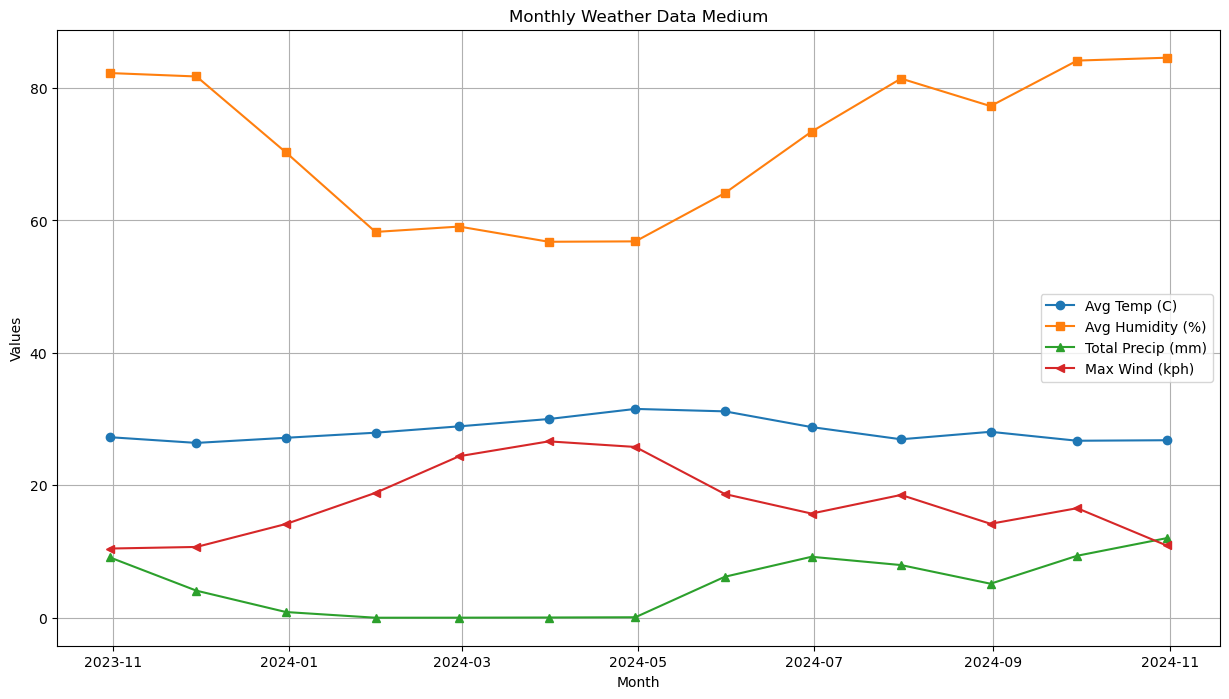

In [124]:
# Giả sử bạn đã có DataFrame df
df = pd.read_csv('weather_data.csv')

# Chuyển đổi cột Date thành kiểu datetime và đặt làm index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Tính toán các giá trị trung bình hàng tháng
monthly_avg_temp = df['Avg Temp (C)'].resample('M').mean()
monthly_avg_humidity = df['Avg Humidity (%)'].resample('M').mean()
monthly_precipitation = df['Total Precip (mm)'].resample('M').mean()
monthly_maxwind = df['Max Wind (kph)'].resample('M').mean()

# Tạo một DataFrame mới chứa các giá trị trung bình hàng tháng
monthly_data = pd.DataFrame({
    'Avg Temp (C)': monthly_avg_temp,
    'Avg Humidity (%)': monthly_avg_humidity,
    'Total Precip (mm)': monthly_precipitation,
    'Max Wind (kph)': monthly_avg_wind
})

# Vẽ biểu đồ kết hợp
plt.figure(figsize=(15, 8))
plt.plot(monthly_data.index, monthly_data['Avg Temp (C)'], label='Avg Temp (C)', marker='o')
plt.plot(monthly_data.index, monthly_data['Avg Humidity (%)'], label='Avg Humidity (%)', marker='s')
plt.plot(monthly_data.index, monthly_data['Total Precip (mm)'], label='Total Precip (mm)', marker='^')
plt.plot(monthly_data.index, monthly_data['Max Wind (kph)'], label='Max Wind (kph)', marker='<')
plt.title('Monthly Weather Data Medium')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

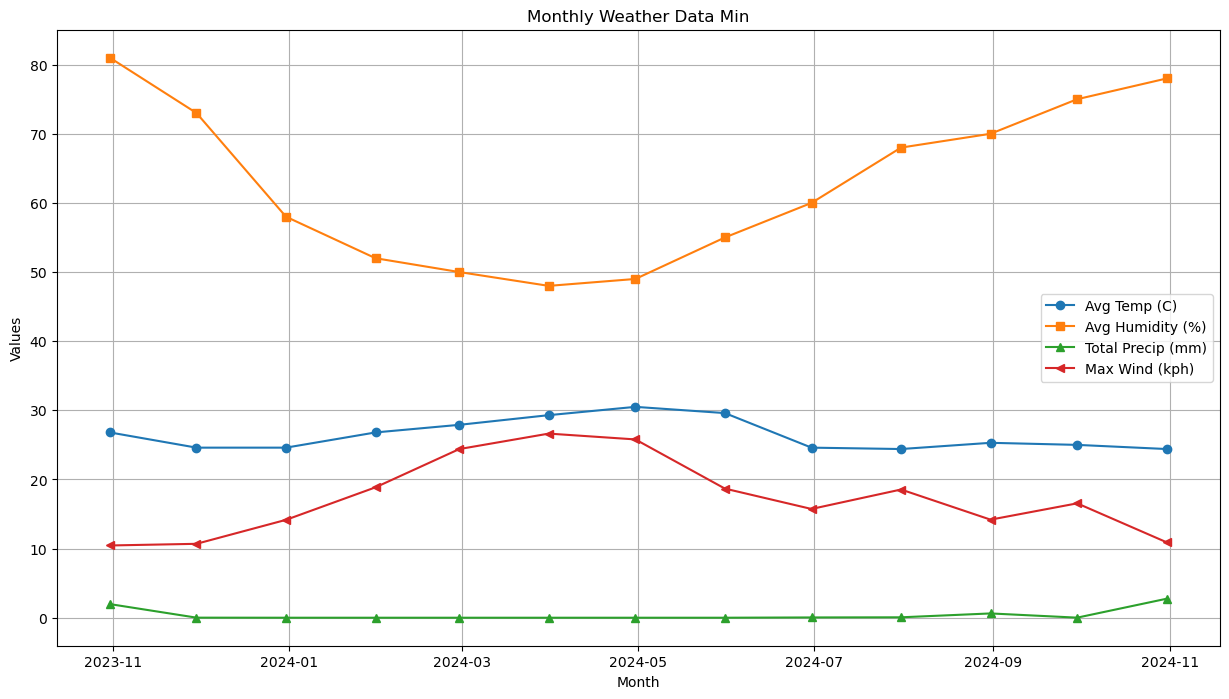

In [125]:
# Giả sử bạn đã có DataFrame df
df = pd.read_csv('weather_data.csv')

# Chuyển đổi cột Date thành kiểu datetime và đặt làm index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Tính toán các giá trị trung bình hàng tháng
monthly_avg_temp = df['Avg Temp (C)'].resample('M').min()                 
monthly_avg_humidity = df['Avg Humidity (%)'].resample('M').min()
monthly_precipitation = df['Total Precip (mm)'].resample('M').min()
monthly_maxwind = df['Max Wind (kph)'].resample('M').min()
# Tạo một DataFrame mới chứa các giá trị trung bình hàng tháng
monthly_data = pd.DataFrame({
    'Avg Temp (C)': monthly_avg_temp,
    'Avg Humidity (%)': monthly_avg_humidity,
    'Total Precip (mm)': monthly_precipitation,
    'Max Wind (kph)': monthly_avg_wind
})

# Vẽ biểu đồ kết hợp
plt.figure(figsize=(15, 8))
plt.plot(monthly_data.index, monthly_data['Avg Temp (C)'], label='Avg Temp (C)', marker='o')
plt.plot(monthly_data.index, monthly_data['Avg Humidity (%)'], label='Avg Humidity (%)', marker='s')
plt.plot(monthly_data.index, monthly_data['Total Precip (mm)'], label='Total Precip (mm)', marker='^')
plt.plot(monthly_data.index, monthly_data['Max Wind (kph)'], label='Max Wind (kph)', marker='<')
plt.title('Monthly Weather Data Min')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

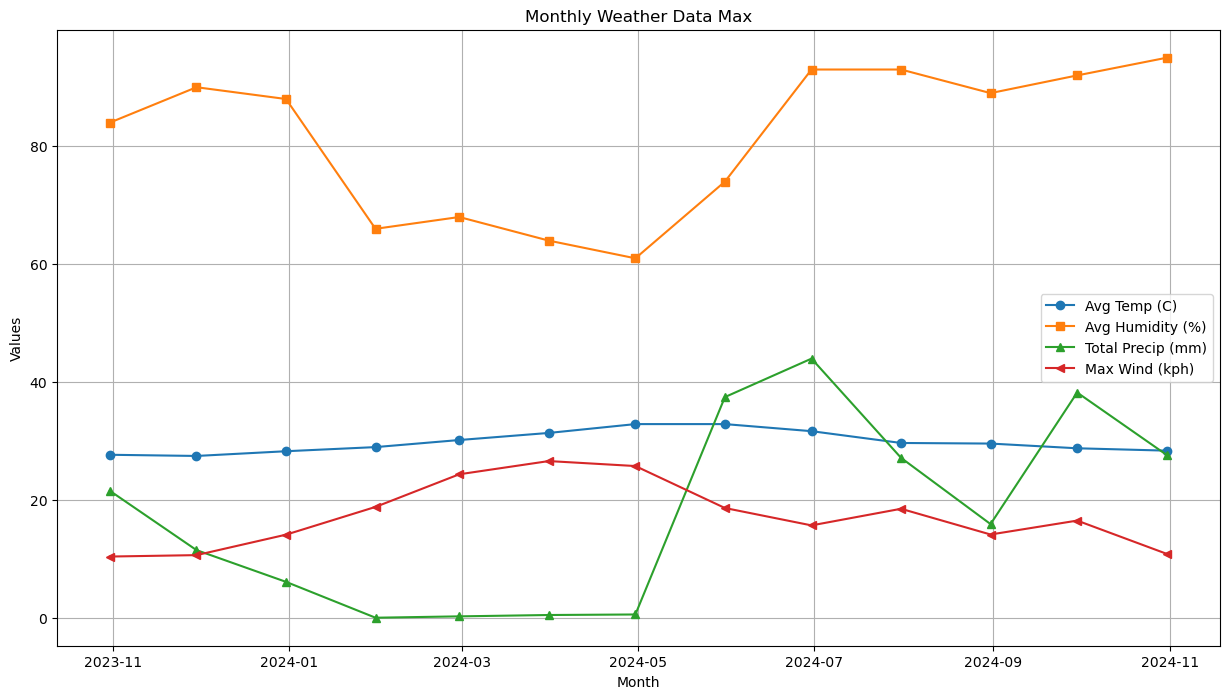

In [126]:
# Giả sử bạn đã có DataFrame df
df = pd.read_csv('weather_data.csv')

# Chuyển đổi cột Date thành kiểu datetime và đặt làm index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Tính toán các giá trị trung bình hàng tháng
monthly_avg_temp = df['Avg Temp (C)'].resample('M').max()
monthly_avg_humidity = df['Avg Humidity (%)'].resample('M').max()
monthly_precipitation = df['Total Precip (mm)'].resample('M').max()
monthly_maxwind = df['Max Wind (kph)'].resample('M').max()
# Tạo một DataFrame mới chứa các giá trị trung bình hàng tháng
monthly_data = pd.DataFrame({
    'Avg Temp (C)': monthly_avg_temp,
    'Avg Humidity (%)': monthly_avg_humidity,
    'Total Precip (mm)': monthly_precipitation,
    'Max Wind (kph)': monthly_avg_wind
})

# Vẽ biểu đồ kết hợp
plt.figure(figsize=(15, 8))
plt.plot(monthly_data.index, monthly_data['Avg Temp (C)'], label='Avg Temp (C)', marker='o')
plt.plot(monthly_data.index, monthly_data['Avg Humidity (%)'], label='Avg Humidity (%)', marker='s')
plt.plot(monthly_data.index, monthly_data['Total Precip (mm)'], label='Total Precip (mm)', marker='^')
plt.plot(monthly_data.index, monthly_data['Max Wind (kph)'], label='Max Wind (kph)', marker='<')
plt.title('Monthly Weather Data Max')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

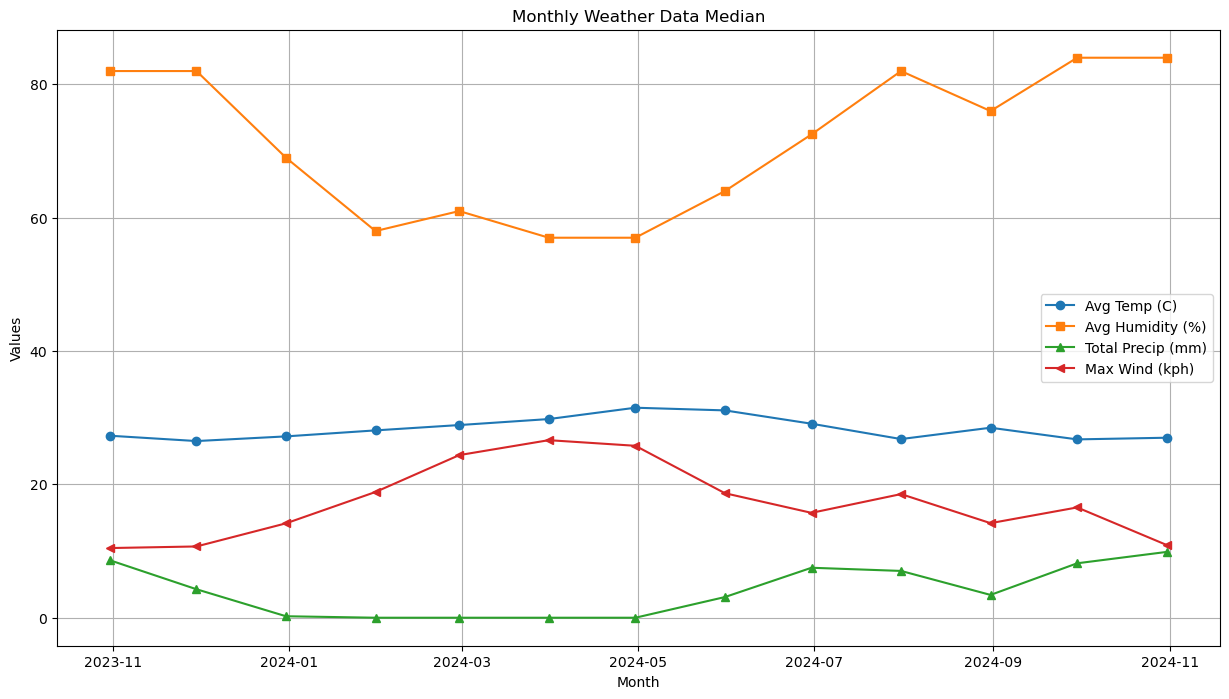

In [127]:
# Giả sử bạn đã có DataFrame df
df = pd.read_csv('weather_data.csv')

# Chuyển đổi cột Date thành kiểu datetime và đặt làm index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Tính toán các giá trị trung bình hàng tháng
monthly_avg_temp = df['Avg Temp (C)'].resample('M').median()
monthly_avg_humidity = df['Avg Humidity (%)'].resample('M').median()
monthly_precipitation = df['Total Precip (mm)'].resample('M').median()
monthly_maxwind = df['Max Wind (kph)'].resample('M').median()
# Tạo một DataFrame mới chứa các giá trị trung bình hàng tháng
monthly_data = pd.DataFrame({
    'Avg Temp (C)': monthly_avg_temp,
    'Avg Humidity (%)': monthly_avg_humidity,
    'Total Precip (mm)': monthly_precipitation,
    'Max Wind (kph)': monthly_avg_wind
})

# Vẽ biểu đồ kết hợp
plt.figure(figsize=(15, 8))
plt.plot(monthly_data.index, monthly_data['Avg Temp (C)'], label='Avg Temp (C)', marker='o')
plt.plot(monthly_data.index, monthly_data['Avg Humidity (%)'], label='Avg Humidity (%)', marker='s')
plt.plot(monthly_data.index, monthly_data['Total Precip (mm)'], label='Total Precip (mm)', marker='^')
plt.plot(monthly_data.index, monthly_data['Max Wind (kph)'], label='Max Wind (kph)', marker='<')
plt.title('Monthly Weather Data Median')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

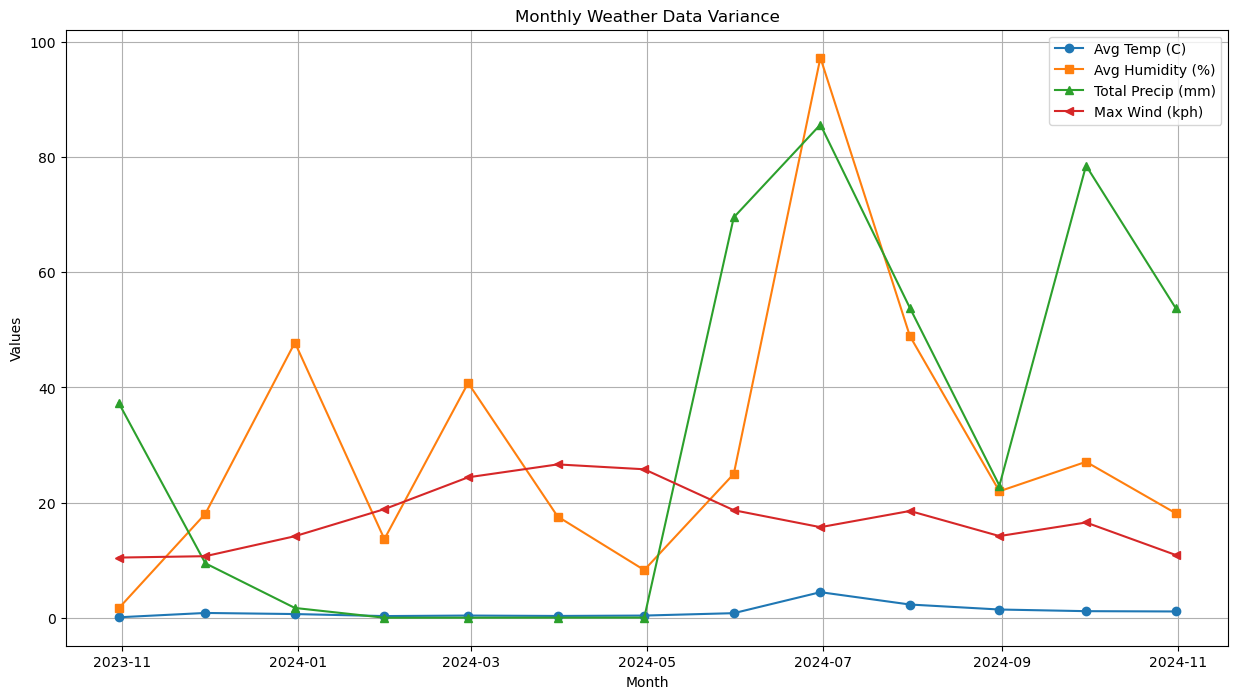

In [128]:
# Giả sử bạn đã có DataFrame df
df = pd.read_csv('weather_data.csv')

# Chuyển đổi cột Date thành kiểu datetime và đặt làm index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Tính toán các giá trị trung bình hàng tháng
monthly_avg_temp = df['Avg Temp (C)'].resample('M').var()
monthly_avg_humidity = df['Avg Humidity (%)'].resample('M').var()
monthly_precipitation = df['Total Precip (mm)'].resample('M').var()
monthly_maxwind = df['Max Wind (kph)'].resample('M').var()
# Tạo một DataFrame mới chứa các giá trị trung bình hàng tháng
monthly_data = pd.DataFrame({
    'Avg Temp (C)': monthly_avg_temp,
    'Avg Humidity (%)': monthly_avg_humidity,
    'Total Precip (mm)': monthly_precipitation,
    'Max Wind (kph)': monthly_avg_wind
})

# Vẽ biểu đồ kết hợp
plt.figure(figsize=(15, 8))
plt.plot(monthly_data.index, monthly_data['Avg Temp (C)'], label='Avg Temp (C)', marker='o')
plt.plot(monthly_data.index, monthly_data['Avg Humidity (%)'], label='Avg Humidity (%)', marker='s')
plt.plot(monthly_data.index, monthly_data['Total Precip (mm)'], label='Total Precip (mm)', marker='^')
plt.plot(monthly_data.index, monthly_data['Max Wind (kph)'], label='Max Wind (kph)', marker='<')
plt.title('Monthly Weather Data Variance')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Correlation between 2 variables


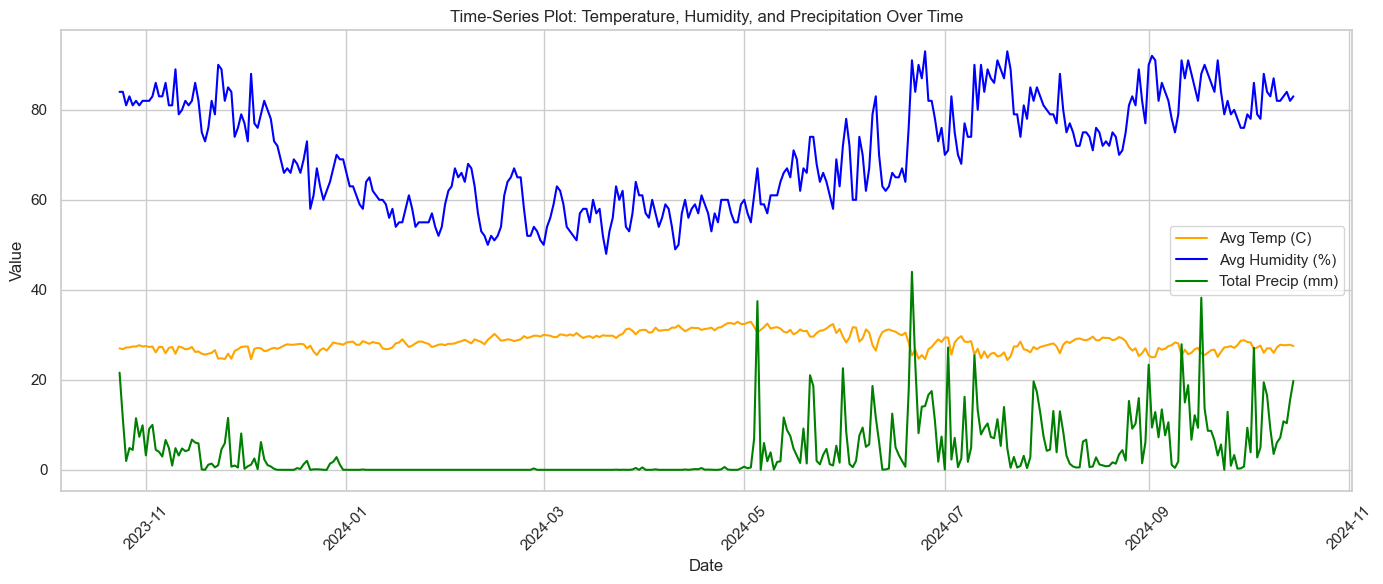

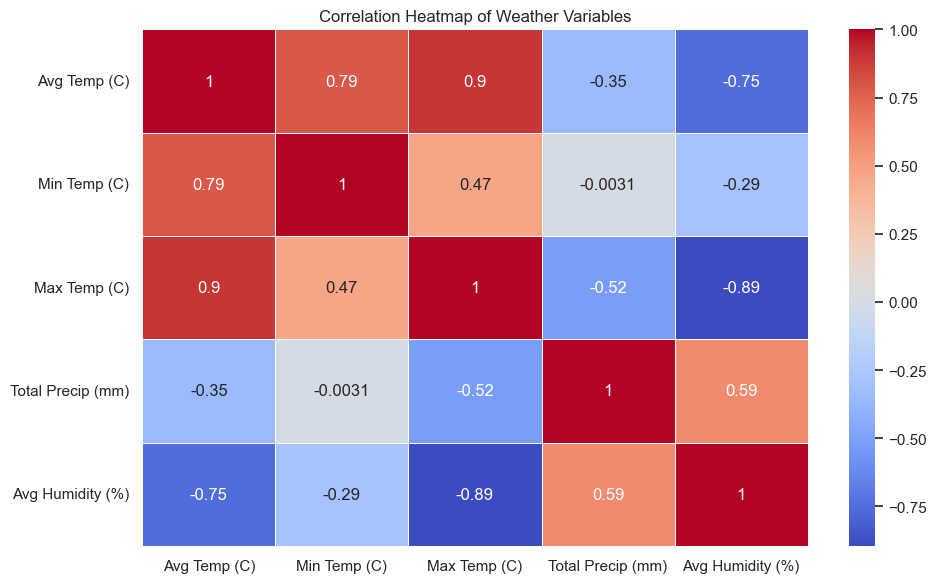

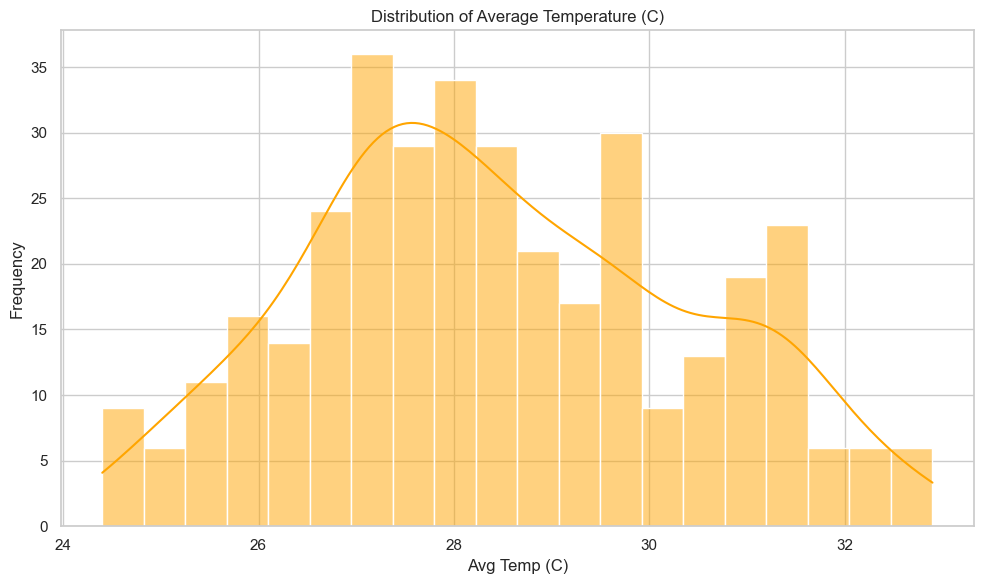

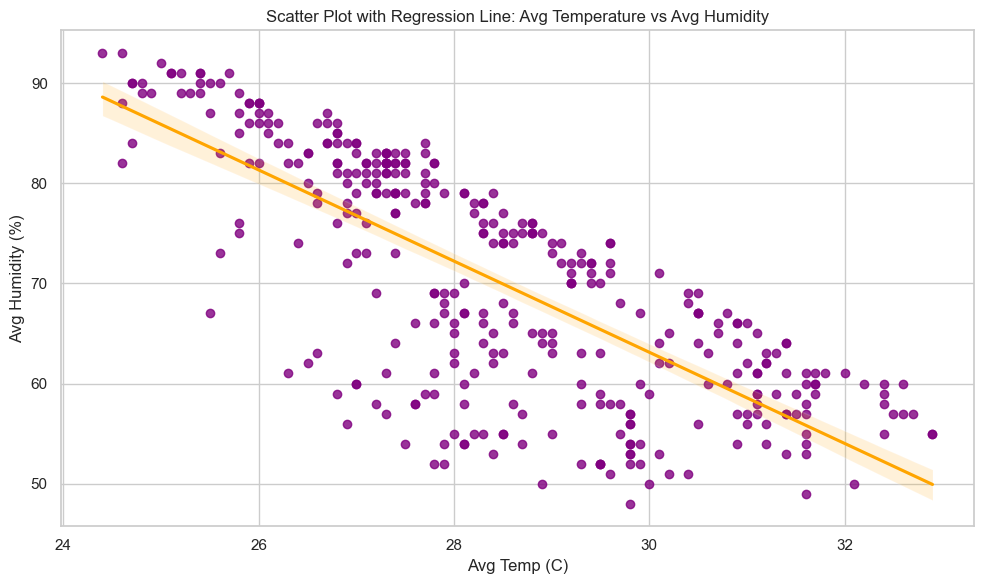

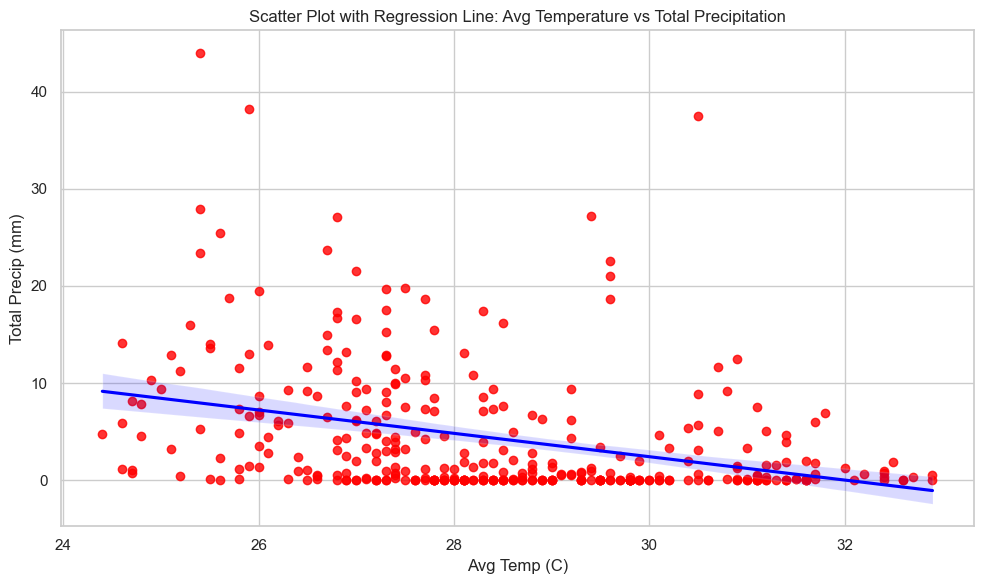

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the processed dataset
df = pd.read_csv('weather_data.csv')

# Convert 'Date' column to datetime for easier plotting
df['Date'] = pd.to_datetime(df['Date'])

# Set style for the plots
sns.set(style="whitegrid")

# 1. Time-Series Plot: Temperature, Humidity, and Precipitation over Time
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Avg Temp (C)'], label='Avg Temp (C)', color='orange')
plt.plot(df['Date'], df['Avg Humidity (%)'], label='Avg Humidity (%)', color='blue')
plt.plot(df['Date'], df['Total Precip (mm)'], label='Total Precip (mm)', color='green')

plt.title('Time-Series Plot: Temperature, Humidity, and Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Correlation Heatmap: Between Key Variables (Excluding 'UV Index' since it caused the error)
plt.figure(figsize=(10, 6))
# Adjust the columns based on what actually exists in your dataset
corr_matrix = df[['Avg Temp (C)', 'Min Temp (C)', 'Max Temp (C)', 'Total Precip (mm)', 'Avg Humidity (%)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Weather Variables')
plt.tight_layout()
plt.show()


# 3. Distribution Plot: Avg Temperature Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Avg Temp (C)'], bins=20, kde=True, color='orange')
plt.title('Distribution of Average Temperature (C)')
plt.xlabel('Avg Temp (C)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Scatter Plot with Regression Line: Avg Temp vs. Avg Humidity
plt.figure(figsize=(10, 6))
sns.regplot(x='Avg Temp (C)', y='Avg Humidity (%)', data=df, color='purple', line_kws={'color': 'orange'})
plt.title('Scatter Plot with Regression Line: Avg Temperature vs Avg Humidity')
plt.xlabel('Avg Temp (C)')
plt.ylabel('Avg Humidity (%)')
plt.tight_layout()
plt.show()

# 5. Scatter Plot with Regression Line: Avg Temp vs. Total Precipitation
plt.figure(figsize=(10, 6))
sns.regplot(x='Avg Temp (C)', y='Total Precip (mm)', data=df, color='red', line_kws={'color': 'blue'})
plt.title('Scatter Plot with Regression Line: Avg Temperature vs Total Precipitation')
plt.xlabel('Avg Temp (C)')
plt.ylabel('Total Precip (mm)')
plt.tight_layout()
plt.show() 

In [86]:
print(weather_data.isnull().sum())

Date                 0
City                 0
Country              0
Local Time           0
Latitude             0
Longitude            0
Max Temp (C)         0
Min Temp (C)         0
Avg Temp (C)         0
Avg Temp (F)         0
Total Precip (mm)    0
Avg Humidity (%)     0
Condition            0
Status               0
Month                0
Day_of_Week          0
Day_of_Year          0
Week_of_Year         0
Day_sin              0
Day_cos              0
Week_sin             0
Week_cos             0
Condition_Encoded    0
dtype: int64


In [88]:
file_path = 'weather_data.csv'
weather_data = pd.read_csv(file_path)

# Ensure 'Date' column is in datetime format
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# Extract useful time-based features
weather_data['Month'] = weather_data['Date'].dt.month
weather_data['Day_of_Week'] = weather_data['Date'].dt.dayofweek
weather_data['Day_of_Year'] = weather_data['Date'].dt.dayofyear
weather_data['Week_of_Year'] = weather_data['Date'].dt.isocalendar().week

def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the season function to the dataset
weather_data['Season'] = weather_data['Month'].apply(assign_season)

# Display the first few rows of the updated dataset
# print(weather_data[['Date', 'Month', 'Season']].head())

# Apply cyclic transformations to capture seasonality patterns
weather_data['Day_sin'] = np.sin(2 * np.pi * weather_data['Day_of_Year'] / 365)
weather_data['Day_cos'] = np.cos(2 * np.pi * weather_data['Day_of_Year'] / 365)
weather_data['Week_sin'] = np.sin(2 * np.pi * weather_data['Week_of_Year'] / 52)
weather_data['Week_cos'] = np.cos(2 * np.pi * weather_data['Week_of_Year'] / 52)

# Display the dataframe with the new features
print(weather_data.head())


        Date  Month Season
0 2023-10-20     10   Fall
1 2023-10-21     10   Fall
2 2023-10-22     10   Fall
3 2023-10-23     10   Fall
4 2023-10-24     10   Fall
        Date              City  Country        Local Time  Latitude  \
0 2023-10-20  Ho Chi Minh City  Vietnam  2024-10-20 11:16     10.75   
1 2023-10-21  Ho Chi Minh City  Vietnam  2024-10-20 11:17     10.75   
2 2023-10-22  Ho Chi Minh City  Vietnam  2024-10-20 11:17     10.75   
3 2023-10-23  Ho Chi Minh City  Vietnam  2024-10-20 11:17     10.75   
4 2023-10-24  Ho Chi Minh City  Vietnam  2024-10-20 11:17     10.75   

   Longitude  Max Temp (C)  Min Temp (C)  Avg Temp (C)  Avg Temp (F)  ...  \
0   106.6667          31.2          24.7          27.0         80.60  ...   
1   106.6667          31.8          24.5          27.3         81.14  ...   
2   106.6667          32.9          24.3          27.3         81.14  ...   
3   106.6667          30.7          24.0          26.5         79.70  ...   
4   106.6667          31.0

In [80]:
label_encoder_condition = LabelEncoder()
weather_data['Condition_Encoded'] = label_encoder_condition.fit_transform(weather_data['Condition'])

# Print encoded values and check
print(weather_data[['Condition', 'Condition_Encoded']].head())

                        Condition  Condition_Encoded
0  Patchy light rain with thunder                 11
1               Light rain shower                  4
2  Patchy light rain with thunder                 11
3               Light rain shower                  4
4               Light rain shower                  4


In [81]:
features = ['Latitude', 'Longitude', 'Max Temp (C)', 'Min Temp (C)', 'Avg Temp (C)', 
            'Total Precip (mm)', 'Avg Humidity (%)', 'Month', 'Day_of_Week', 'Day_of_Year', 'Week_of_Year']
X = weather_data[features]
y = weather_data['Condition_Encoded']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print scaled data to check
print(X_scaled[:5])

[[ 0.00000000e+00 -1.42108547e-14 -7.43909224e-01 -2.10777331e-01
  -7.37487596e-01  4.38980059e+00  1.32761644e+00  1.02151286e+00
   4.97418384e-01  1.05273330e+00  1.03867359e+00]
 [ 0.00000000e+00 -1.42108547e-14 -5.66215302e-01 -3.41542359e-01
  -5.83109891e-01  9.77908108e-02  9.04182824e-01  1.02151286e+00
   9.96214658e-01  1.06222636e+00  1.03867359e+00]
 [ 0.00000000e+00 -1.42108547e-14 -2.40443111e-01 -4.72307387e-01
  -5.83109891e-01  2.59254927e-01  9.88869547e-01  1.02151286e+00
   1.49501093e+00  1.07171942e+00  1.03867359e+00]
 [ 0.00000000e+00 -1.42108547e-14 -8.91987493e-01 -6.68454928e-01
  -9.94783769e-01  5.73376025e-01  1.24292971e+00  1.02151286e+00
  -1.49776671e+00  1.08121249e+00  1.10531660e+00]
 [ 0.00000000e+00 -1.42108547e-14 -8.03140531e-01 -3.41542359e-01
  -7.37487596e-01  2.52562397e+00  1.15824299e+00  1.02151286e+00
  -9.98970439e-01  1.09070555e+00  1.10531660e+00]]


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print("Training set size: ", X_train.shape)
print("Test set size: ", X_test.shape)

Training set size:  (289, 11)
Test set size:  (73, 11)


In [83]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Check if training was successful
print("Model trained successfully.")

Model trained successfully.


In [84]:
# Step 7: Make predictions and evaluate the model
y_pred = gb_classifier.predict(X_test)

# Calculate accuracy and display the classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print(classification_rep)

Accuracy:  0.6712328767123288
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         1
           4       0.83      0.89      0.86        27
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           8       0.67      0.76      0.71        21
           9       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.67      0.80      0.73        10
          13       0.25      0.20      0.22         5

    accuracy                           0.67        73
   macro avg       0.24      0.27      0.25        73
weighted avg       0.61      0.67      0.64        73



c:\Users\phuvo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phuvo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phuvo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
from sklearn.model_selection import GridSearchCV

# Step 1: Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Step 2: Initialize the GridSearchCV with the Gradient Boosting Classifier
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')

# Step 3: Fit the model with different hyperparameters
grid_search.fit(X_train, y_train)

# Step 4: Get the best parameters and the best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Accuracy: ", best_accuracy)

c:\Users\phuvo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Best Accuracy:  0.6263244558991982


In [92]:

# Initialize the Random Forest model with class weighting to handle imbalance
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model with the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred)


# Display the accuracy and classification report
print("Accuracy_rf: ", accuracy_rf)
print(classification_rep_rf)

Accuracy_rf:  0.6986301369863014
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         1
           4       0.83      0.89      0.86        27
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           8       0.67      0.76      0.71        21
           9       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.67      0.80      0.73        10
          13       0.25      0.20      0.22         5

    accuracy                           0.67        73
   macro avg       0.24      0.27      0.25        73
weighted avg       0.61      0.67      0.64        73



c:\Users\phuvo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phuvo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phuvo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
new_data = {
    'Latitude': 10.7769,  # Example latitude for Ho Chi Minh City
    'Longitude': 106.6956,  # Example longitude for Ho Chi Minh City
    'Max Temp (C)': 30,  # Example max temperature
    'Min Temp (C)': 25,  # Example min temperature
    'Avg Temp (C)': (30 + 25) / 2,  # Average of max and min temperatures
    'Total Precip (mm)': 0,  # Example precipitation
    'Avg Humidity (%)': 80,  # Example humidity
    'Date': '2024-10-22'  # Example date
}

# Convert to DataFrame
new_data_df = pd.DataFrame([new_data])

# Process the new data
new_data_df['Date'] = pd.to_datetime(new_data_df['Date'])
new_data_df['Month'] = new_data_df['Date'].dt.month
new_data_df['Day_of_Week'] = new_data_df['Date'].dt.dayofweek
new_data_df['Day_of_Year'] = new_data_df['Date'].dt.dayofyear
new_data_df['Week_of_Year'] = new_data_df['Date'].dt.isocalendar().week

# Assign season
new_data_df['Season'] = new_data_df['Month'].apply(assign_season)

# Select features to scale
new_data_features = new_data_df[features]

# Scale the features using the previously fitted scaler
new_data_scaled = scaler.transform(new_data_features)

# Make a prediction using the trained Random Forest model
predicted_condition = rf_classifier.predict(new_data_scaled)

# Convert predicted label back to original condition
predicted_condition_label = label_encoder_condition.inverse_transform(predicted_condition)

predicted_condition_label[0]

'Partly cloudy'